# Git Tutorial
Author Joel Ridden (20221104)

# Git Basics 

Ensure you have your global username and email set.
This can be check by the following git command.
This is your identity for Git which is very important when collaborating.

In [4]:
!git config --list

user.name=joelridden
user.email=jriddenw@gmail.com
core.autocrlf=input
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/joelridden/git_tutorial.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.master.remote=origin
branch.master.merge=refs/heads/master


In [3]:
!git config --global user.name "joelridden"
!git config --global user.email "jriddenw@gmail.com"

In [5]:
!git help

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone             Clone a repository into a new directory
   init              Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add               Add file contents to the index
   mv                Move or rename a file, a directory, or a symlink
   restore           Restore working tree files
   rm                Remove files from the working tree and from the index
   sparse-checkout   Initialize and modify the sparse-checkout

examine the history and state (see also: git help revisio

# Tracking Changes

Create a new file called faults.txt and add a fault [Hossack]

Status shows that a file has been made.

In [2]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   QuakeCoRE Git Workshop.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


Untracked means that there’s a file in the directory that Git isn’t keeping track of. We can tell Git to track a file using git add.

In [4]:
!git add faults.txt

Now the status will show us that it is meant to keep track of faults.txt

In [5]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   QuakeCoRE Git Workshop.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


Now we can commit these changes to our local Git repository. Using the following command and -m to add a message explaining breifly what has been changed / added.

In [7]:
!git commit -m "Adding faults file"

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   QuakeCoRE Git Workshop.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


Add a new fault to faults.txt [AlpineF2K]

When we run git status now, it tells us that a file it already knows about has been modified.

In [9]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   QuakeCoRE Git Workshop.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


We can check the difference between our current version and what we have commited to Git by using git diff.

In [10]:
!git diff

diff --git a/QuakeCoRE Git Workshop.ipynb b/QuakeCoRE Git Workshop.ipynb
index d8dd6dd..237ec3b 100644
--- a/QuakeCoRE Git Workshop.ipynb	
+++ b/QuakeCoRE Git Workshop.ipynb	
@@ -138,9 +138,117 @@
   },
   {
    "cell_type": "code",
-   "execution_count": null,
+   "execution_count": 2,
    "id": "3406a684",
    "metadata": {},
+   "outputs": [
+    {
+     "name": "stdout",
+     "output_type": "stream",
+     "text": [
+      "On branch master\n",
+      "Your branch is up to date with 'origin/master'.\n",
+      "\n",
+      "Changes not staged for commit:\n",
+      "  (use \"git add <file>...\" to update what will be committed)\n",
+      "  (use \"git restore <file>...\" to discard changes in working directory)\n",
+      "\tmodified:   QuakeCoRE Git Workshop.ipynb\n",
+      "\n",
+      "no changes added to commit (use \"git add\" and/or \"git commit -a\")\n"
+     ]
+    }
+   ],
+   "source": [
+    "!git status"
+   ]
+  },
+  {
+   "cell_type": "code",
+   "execution_count"

The file will have its original line endings in your working directory


Now we can add and commit the new fault with another git add and commit command.

In [14]:
!git add faults.txt

In [12]:
!git commit -m "Adding another fault"

SyntaxError: invalid syntax (469351072.py, line 1)

Below shows how git add and git commit works together. By using git add we can add files to the staging area and then with git commit we take those staged changes and commit them to the repository.

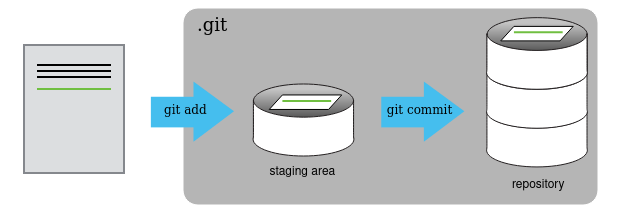

You can also add entire folders with git add.

Say we add a Data folder and then place 2 files a.txt and b.txt.
The folder and everythign inside can be added using the following git command.

In [16]:
!git add Data

fatal: pathspec 'Data' did not match any files


# Managing History

Add another fualt to faults.txt [Moonshine]

We can look at the difference between our current version and past versions by using git diff but with specifying a version of our git repository. This can be done by comparing with the HEAD of the repository. This is the most recent commit to our current branch.

In [17]:
!git diff HEAD faults.txt

In [18]:
!git diff HEAD~1 faults.txt

We can also use a specific commit ID tag to compare. To find this we can use the git show command to extract the ID.

In [19]:
!git show HEAD~3 faults.txt

fatal: ambiguous argument 'HEAD~3': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'


Once we have the commit ID we can insert this into the git diff to compare.

In [21]:
!git diff [commit ID]

fatal: ID]: no such path in the working tree.
Use 'git <command> -- <path>...' to specify paths that do not exist locally.


We can use this feature also to revert back to a previous commit for faults.txt

In [22]:
!git checkout HEAD faults.txt

SyntaxError: invalid syntax (1787912322.py, line 1)

In [23]:
!git checkout [commit ID] faults.txt

SyntaxError: invalid syntax (2091873262.py, line 1)

Care about missing the faults.txt

In [ ]:
git checkout [commit ID]
You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

git checkout -b <new-branch-name>
git checkout master

# Git Ignore

Not all files need to be added to git. For example Data files can be quite large, csvs and srfs can take up alot of space and are not always needed in the repository. We can create a file that lists the files for git to ignore.

Create a file called .gitignore and place inside:
*.csv
*.srf
/results
This will ignore all csv and srf files and any files within the results folder.

We need to add the .gitignore file to git with the git add and git commit commands again.

In [25]:
!git add .gitignore
!git commit -m "Ignore csv/srf files and results folder"

SyntaxError: invalid syntax (3155907413.py, line 1)

If we try to git add a csv file we will get an error.

In [26]:
!git add a.csv

fatal: pathspec 'a.csv' did not match any files


However we can force this with using the -f parameter.

In [27]:
!git add -f a.csv

fatal: pathspec 'a.csv' did not match any files


# Git Remote Repositories

Create a new repo online at github.com 

In [28]:
!git remote add origin [git url]

SyntaxError: invalid syntax (996889091.py, line 1)

Check it worked

In [29]:
!git remote -v

origin	https://github.com/joelridden/git_tutorial.git (fetch)
origin	https://github.com/joelridden/git_tutorial.git (push)


SSH is useful for most of our other git repositories for commiting and pulling private repositories data which some of our repositories are.

Check if there is any current ssh keys you have

In [30]:
!ls -al ~/.ssh

Invalid switch - ".ssh".


Create a new ssh key

In [ ]:
!ssh-keygen -t ed25519
# Set no passphrase unless you want to enter this password each time you want to pull from Github

Now you can check and shoudl see soem keys available to use.

In [ ]:
!ls -al ~/.ssh

Now we can add the SSH key to the ssh-agent usign the following commands.

In [ ]:
!eval "$(ssh-agent -s)"
!ssh-add ~/.ssh/id_ed25519

We now need to add our public key to the git repository we made.

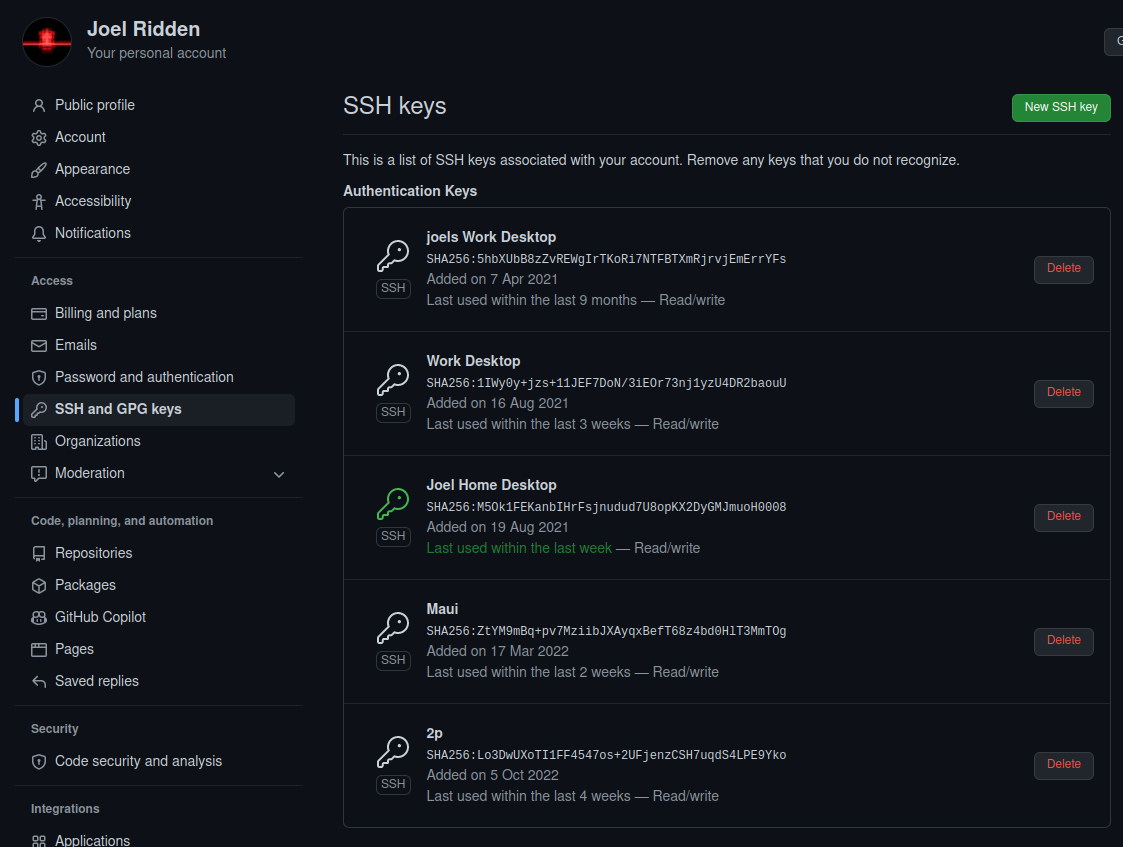

We can get the information from the public key by using the following command.

In [ ]:
!cat ~/.ssh/id_ed25519.pub

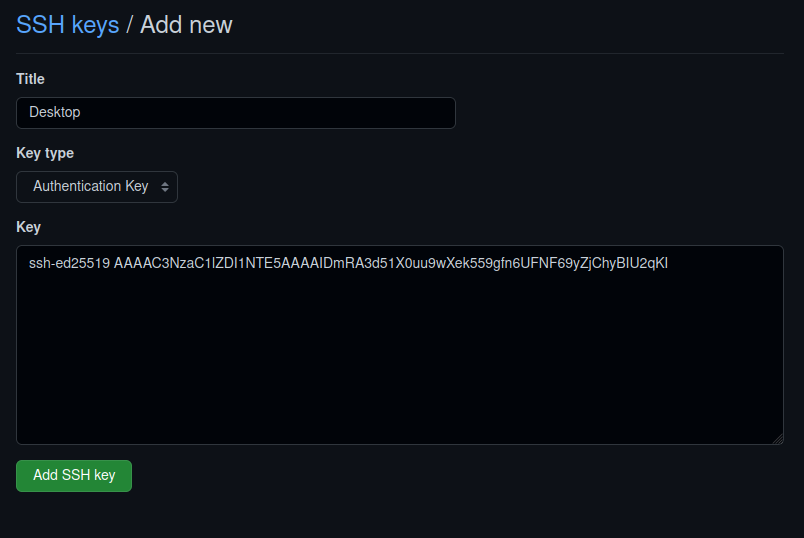

Now we should be able to push our changes to our remote repository.

In [ ]:
!git push origin master

# Git Collaboration

Sometimes we will need to work together on a repository as we may have code we share and develop together.

Show images for adding a collaborator to the git repo.

Add a new file stations.txt
CCCC # Christchurch

In [ ]:
!git add stations.txt
!git commit -m "Adding stations"
!git push origin master

Owner can now pull these changes and get the CCCC stations file.

In [ ]:
!git pull origin master